In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-07-08 18:05:31.773710: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 18:05:31.776769: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 18:05:31.786928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 18:05:31.807459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 18:05:31.807513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 18:05:31.821050: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
try:
    # Intentar leer el archivo localmente
    data = pd.read_csv('../data/Steel_industry_data.csv')
except FileNotFoundError:
    # Si no se encuentra, leer desde la URL
    data = pd.read_csv(
        'https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/main/data/Steel_industry_data.csv')

# Seleccionar las columnas para la regresión
features = data.drop(columns=['date', 'Usage_kWh'])
target = data['Usage_kWh']
categorical_features = features[['WeekStatus', 'Day_of_week', 'Load_Type']]
numerical_features = features.drop(columns=categorical_features)
X_categorical = pd.get_dummies(categorical_features, columns=["Day_of_week", "Load_Type", "WeekStatus"], drop_first=False)

scaler = StandardScaler()
X_numerical = scaler.fit_transform(numerical_features)
X_numerical_ = pd.DataFrame(X_numerical, columns=numerical_features.columns)

X = pd.concat([X_numerical_, X_categorical], axis=1)

In [3]:
y = target

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Definir el modelo
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='linear'))  # Salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test set: {mae}")

# Hacer predicciones
y_pred = model.predict(X_test)

# Mostrar algunas predicciones
print(y_pred[:5])

Epoch 1/100


/home/lhuacho/rutaAlejandría/PUCP/2024-I/Aprendizaje Automático (INF648-0001)/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-08 18:07:05.889584: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1703.7787 - mean_absolute_error: 24.8627 - val_loss: 1659.8026 - val_mean_absolute_error: 24.8690
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: 1457.0508 - mean_absolute_error: 23.2100 - val_loss: 1522.2600 - val_mean_absolute_error: 25.3128
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 1403.0305 - mean_absolute_error: 24.1889 - val_loss: 1371.9646 - val_mean_absolute_error: 21.8946
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1268.7246 - mean_absolute_error: 20.5716 - val_loss: 1233.5419 - val_mean_absolute_error: 20.1812
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 1116.1749 - mean_absolute_error: 18.7999 - val_loss: 1111.5493 - val_mean_absolute_error: 18.8708
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 1013.6061 - mean_absolute_error: 17.6222 - val_loss: 1001.1362 - val_mean_absolute_error: 17.6907
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/

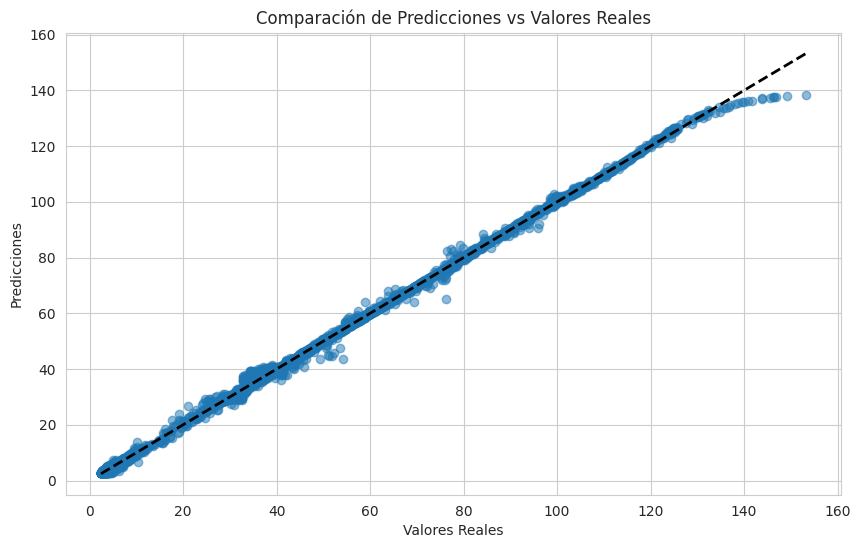

In [6]:
import matplotlib.pyplot as plt

# Graficar y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()
